<div align = "center">

<p> <font size = 5px> Winning Rate of Dota2 Learning Model </font> </p>
<p> <font size = 5px> Based on Selection of Heroes </font> </p>
 
</div>

#Abstract

In this Model, we are building learning models of the winning rate of Dota 2 game based on the hero selection of the game. Since there could be many unpredictable factors in the game, and the only variable available for us is the hero selection, the model does not perform well with a high error rate. If we could have more information about the game, we may make a better prediction

#Background

Dota 2 is a popular multiplayer online battle arena (MOBA) game developed and published by Valve Corporation. In Dota 2, two teams of five players each compete against each other, with the objective of destroying the enemy team's Ancient, a large structure located at each team's base.

At the start of the game each player chooses a unique hero with different strengths and weaknesses. There were 113 heroes for all the players to select from. However, players cannot select repeated heroes within and across teams, which means that the hero appears at most once each game. For more information about Dota 2, please click <a href = "https://en.wikipedia.org/wiki/Dota_2">here</a>.

In professional Dota 2 matches, hero picks and bans are a crucial aspect of the game, as the right hero combinations can give a team a significant advantage over the other. As such, there has been considerable interest in developing models that can predict which hero picks are most likely to lead to a victory.

#Data Description

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

In [2]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=105YSQRGJcrcOvSvLBSjTQSwBVJOobaxz" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=105YSQRGJcrcOvSvLBSjTQSwBVJOobaxz" -o "heroes.json"
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1CI6GAtXDS6Q8K8QJzzxPnGiPIIxouB15" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1CI6GAtXDS6Q8K8QJzzxPnGiPIIxouB15" -o "dota2Train.csv"
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1pf-XhFCkni3cxPgjHgRKSR2vvz2nT5RK" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1pf-XhFCkni3cxPgjHgRKSR2vvz2nT5RK" -o "dota2Test.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 13274  100 13274    0     0  16012      0 --:--:-- --:--:-- --:--:-- 16012
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 21.3M  100 21.3M    0     0  10.4M      0  0:00:02  0:00:02 --:--:-- 21.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0- --:--:--     0
100 2427k  100 2427k    0     0  1935k      0  0:00:01  0:00:01 --:--:-- 16.1M


The Dota2 Games Data Set is sourced from the UCI Machine Learning Repository and comprises 102,942 data points, each containing 117 features. The dataset contains both training and test sets, with the training set comprising 92,650 data points, and the test set containing 10,294 data points. The data is from the games that were played in a space of 2 hours on the 13th of August, 2016.
Each row of data includes 117 columns, with the first variable being a binary variable that indicates the winner of the game, represented as 1 for the winner and -1 for the loser. The second column is the cluster ID, which is related to the game location, and the third column represents the game mode, such as "All Pick." The fourth column specifies the game type, such as "Ranked." The remaining columns, from the fifth column onwards, describe whether a hero is selected.

##Variable Description

The hero selection feature is represented by a value of 1, which indicates that a player from team 1 played as that hero and -1 for tem 2. A value of 0 indicates that the hero is not selected. Each game allows the selection of ten heroes, with only one player able to select each hero. This means that each row has five 1 and five -1 values, and there are a total of 113 columns that correspond to different heroes.

In [3]:
train_sample = pd.read_csv("dota2Train.csv", header=None)
test_sample = pd.read_csv("dota2Test.csv", header=None)

In [4]:
train_sample

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,154,2,3,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,154,2,2,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,111,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,185,2,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_sample

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,121,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
10290,1,154,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10291,1,122,9,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10292,1,152,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extract the hero names and match with the dataset


The mapping of hero names to IDs can be found <a href =
"https://github.com/kronusme/dota2-api/blob/master/data/heroes.json">here</a>.

In [6]:
import json
map_file = open("heroes.json")
with open("heroes.json") as f:
    data = json.load(f)
    
hero_mapping = json.load(map_file)
hero_names = ["unknown"+str(i) for i in range(113)]
for i in hero_mapping["heroes"]:
    hero_names[i["id"]-1] = i["localized_name"]

print(len(hero_names))
print(hero_names)

113
['Anti-Mage', 'Axe', 'Bane', 'Bloodseeker', 'Crystal Maiden', 'Drow Ranger', 'Earthshaker', 'Juggernaut', 'Mirana', 'Morphling', 'Shadow Fiend', 'Phantom Lancer', 'Puck', 'Pudge', 'Razor', 'Sand King', 'Storm Spirit', 'Sven', 'Tiny', 'Vengeful Spirit', 'Windranger', 'Zeus', 'Kunkka', 'unknown23', 'Lina', 'Lion', 'Shadow Shaman', 'Slardar', 'Tidehunter', 'Witch Doctor', 'Lich', 'Riki', 'Enigma', 'Tinker', 'Sniper', 'Necrophos', 'Warlock', 'Beastmaster', 'Queen of Pain', 'Venomancer', 'Faceless Void', 'Skeleton King', 'Death Prophet', 'Phantom Assassin', 'Pugna', 'Templar Assassin', 'Viper', 'Luna', 'Dragon Knight', 'Dazzle', 'Clockwerk', 'Leshrac', "Nature's Prophet", 'Lifestealer', 'Dark Seer', 'Clinkz', 'Omniknight', 'Enchantress', 'Huskar', 'Night Stalker', 'Broodmother', 'Bounty Hunter', 'Weaver', 'Jakiro', 'Batrider', 'Chen', 'Spectre', 'Ancient Apparition', 'Doom', 'Ursa', 'Spirit Breaker', 'Gyrocopter', 'Alchemist', 'Invoker', 'Silencer', 'Outworld Devourer', 'Lycanthrope', '

In [7]:
col_names = ["winner", "cluster_ID", "game_mode", "game_type"]+hero_names
train_data = pd.read_csv("dota2Train.csv",names = col_names)
test_data = pd.read_csv("dota2Test.csv",names = col_names)
#all_attrs_data = pd.concat([train_data,test_data])

In [8]:
train_data

,winner,cluster_ID,game_mode,game_type,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,154,2,3,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,154,2,2,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,111,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,185,2,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_data

,winner,cluster_ID,game_mode,game_type,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,121,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
10290,1,154,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10291,1,122,9,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10292,1,152,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#dropping irrelevant columns
train_data = train_data.drop(["cluster_ID", "game_mode", "game_type", "unknown23", "Abyssal Underlord"],axis = 1)
test_data = test_data.drop(["cluster_ID", "game_mode", "game_type", "unknown23", "Abyssal Underlord"],axis = 1)
hero_names = [i for i in hero_names if "unknown" not in i]
del hero_names[-6]

train_data

,winner,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,Earthshaker,Juggernaut,Mirana,...,Elder Titan,Legion Commander,Techies,Ember Spirit,Earth Spirit,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,-1,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,-1,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,1,0,0,-1,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
92646,1,0,0,0,0,-1,0,0,-1,0,...,0,1,0,0,0,0,0,0,0,0
92647,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
92648,-1,0,0,0,0,0,1,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


##Basic Plots 

In [11]:
all_data = pd.concat([train_data,test_data])
all_data.shape

(102944, 112)

For the all_data data frame, we have 102944 rows as our data pool and 111 heros.

###Winning Count for Each Team

Text(0.5, 1.0, 'Odds of Team 1 VS Team 2')

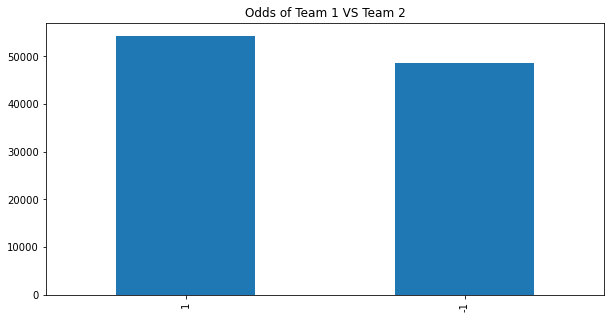

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
all_data['winner'].value_counts().plot(kind='bar', ax=ax1)
plt.title("Odds of Team 1 VS Team 2")

To explore the dataset and visualize it. We first plotted the number of wins for each team. We found team 1 wins just a little bit more than team 2 in this dataset. 

###Hero Popularity

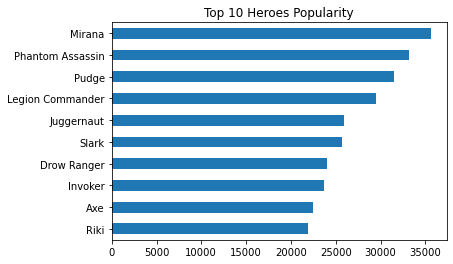

In [13]:
hero_win_count = pd.DataFrame.from_dict({i:len(all_data[all_data[i]==all_data["winner"]]) for i in hero_names},
                                        orient='index',
                                        columns=['win_count']).T
hero_pick_count = all_data.astype(bool).sum(axis=0).iloc[1:].T
hero_win_rate = (hero_win_count/hero_pick_count).rename(index={"win_count":"win_rate"})
fig, ax1 = plt.subplots(1, 1)
hero_pick_count.nlargest(10)[::-1].plot.barh()
plt.title("Top 10 Heroes Popularity")
plt.show()

From the chart, Mirana is the most popular hero among all the heroes. Phantom Assassin is the second and Pudge is the third. We got their ranking according to the sum of times they appear in all games. However, popularity does not mean a high winning rate. 

###Number of Games Won

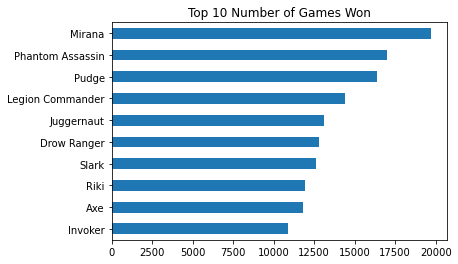

In [14]:
fig, ax1 = plt.subplots(1, 1)
hero_win_count.iloc[0].nlargest(10)[::-1].plot.barh()
plt.title("Top 10 Number of Games Won")
plt.show()

It is not surprising that a hero with high popularity will also have more winning games since their attendance rate is also high. The thing we care most is actually the winning rate as follows.

###Winning Rate

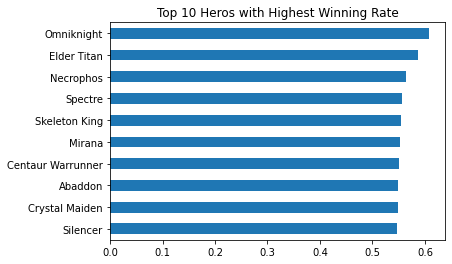

In [15]:
fig, ax1 = plt.subplots(1, 1)
hero_win_rate.iloc[0].nlargest(10)[::-1].plot.barh()
plt.title("Top 10 Heros with Highest Winning Rate")
plt.show()

We can see that although Mirana has the highest popularity and number of winning games, the overall winning rate performs not so well. On the contrary, Omniknight, Elder Titan and Necrophos has the top three winning rate.

###Hero Synergy Analysis

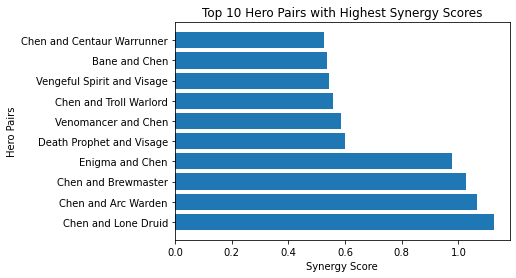

In [16]:
# create a list of all possible hero pairs
hero_pairs = []
for i in range(len(hero_names)):
    for j in range(i+1, len(hero_names)):
        hero_pairs.append((hero_names[i], hero_names[j]))

# # calculate win rates for each hero pair
pair_win_rates = {}
for pair in hero_pairs:
#     filters the rows where both heroes of the pair are selected by the same team in a game
    pair_win_rates[pair] = all_data[(all_data[pair[0]] == 1) & (all_data[pair[1]] == 1)]["winner"].mean()

# # calculate win rates for each hero pair
# pair_win_rates = {}
# for pair in hero_pairs:
#     # count the number of times this hero pair appears in winning games
#     win_count = ((all_data[pair[0]] == 1) & (all_data[pair[1]] == 1) & (all_data["winner"] == 1)).sum()
#     # count the number of times this hero pair appears in all games
#     total_count = ((all_data[pair[0]] == 1) & (all_data[pair[1]] == 1)).sum()
#     # calculate the win rate as the ratio of the two counts
#     if total_count > 0:
#         pair_win_rates[pair] = win_count / total_count
#     else:
#         pair_win_rates[pair] = 0


# calculate individual win rates for each hero
hero_win_rates = {}
for hero in hero_names:
    hero_win_rates[hero] = all_data[all_data[hero] == 1]["winner"].mean()

# compare pair win rates to individual win rates
synergies = {}
for pair in hero_pairs:
    expected_win_rate = (hero_win_rates[pair[0]] + hero_win_rates[pair[1]]) / 2
    actual_win_rate = pair_win_rates[pair]
    if actual_win_rate > expected_win_rate:
        synergies[pair] = actual_win_rate - expected_win_rate

# print top 10 hero pairs with the highest synergy scores
sorted_synergies = sorted(synergies.items(), key=lambda x: x[1], reverse=True)
# for i in range(10):
#     print(sorted_synergies[i])

top_pairs = sorted_synergies[:10]
top_pairs_names = [f"{pair[0][0]} and {pair[0][1]}" for pair in top_pairs]
synergy_scores = [pair[1] for pair in top_pairs]

# plot the results in a horizontal bar chart
plt.barh(top_pairs_names, synergy_scores)
plt.xlabel("Synergy Score")
plt.ylabel("Hero Pairs")
plt.title("Top 10 Hero Pairs with Highest Synergy Scores")
plt.show()


From the above chart, we can see that the hero pairs with the highest synergy scores are often include hero Chen. It have a significantly higher win rate when played together than what would be expected based on the win rates of itself. This suggests that chen have strong synergy and complement many other heros well in a game. 

###Hero Counter Analysis

Top 10 Hero Counters:


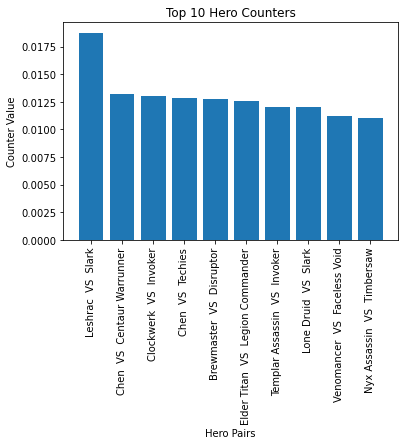

In [39]:
# create a list of all possible hero pairs
hero_pairs = []
for i in range(len(hero_names)):
    for j in range(i+1, len(hero_names)):
        hero_pairs.append((hero_names[i], hero_names[j]))

# calculate win rates for each hero pair
pair_win_rates = {}
for pair in hero_pairs:
    pair_win_rates[pair] = all_data[(all_data[pair[0]] == 1) & (all_data[pair[1]] == 0)]["winner"].mean()

# calculate individual win rates for each hero
hero_win_rates = {}
for hero in hero_names:
    hero_win_rates[hero] = all_data[all_data[hero] == 1]["winner"].mean()

# compare pair win rates to individual win rates
counters = {}
for pair in hero_pairs:
    expected_win_rate = hero_win_rates[pair[0]]
    actual_win_rate = pair_win_rates[pair]
    if actual_win_rate < expected_win_rate:
        counters[pair] = expected_win_rate - actual_win_rate

# get the top 10 counter pairs
top_counters = sorted(counters.items(), key=lambda x: x[1], reverse=True)[:10]

# print top 10 hero pairs with the highest counter scores
print("Top 10 Hero Counters:")

# create lists of the hero pairs and their counter values
hero_pairs = [f"{pair[0][0]}  VS  {pair[0][1]}" for pair in top_counters]
counter_values = [pair[1] for pair in top_counters]

# create a bar chart
plt.bar(hero_pairs, counter_values)
plt.title("Top 10 Hero Counters")
plt.xlabel("Hero Pairs")
plt.xticks(rotation=90)
plt.ylabel("Counter Value")
plt.show()

Based on the hero counter analysis, we can see that some hero pairs have a comparatively high counter value, meaning that when one hero is picked, it is comparatively effective against the other hero. However, it's difficult to say if there are any clear rules that can be deducted from the data, as the effectiveness of a hero depends on many factors, including the specific strategies and tactics employed by the players in each game.

That being said, the data does provide some insights into which hero pairs are particularly effective against each other, which could be useful for players looking to gain an advantage in their matches. For example, based on the top 10 counter pairs, we can see that picking Leshrac as a counter to Slark, or picking Chen as a counter to Centuar Warrunner, may be particularly effective strategies.

#Model Training

## Preprocess Data

From the dimensions of the data, we can easily find that there were too many variables and most of which are zeroes. To learn dispersed data, we should have some ideas to transform the data.


Categorical variables cannot be directly used in most machine learning algorithms because they are non-numeric. Therefore, you typically need to convert them into a numerical form that can be used by the algorithm. There are several common techniques for doing this, including one-hot encoding, label encoding, and binary encoding, among others.


### Combination Embedding

In this method, we apply simple embedding to reduce the dimension. We consider every team is one combination of 112 chooose 5. And then, we use 1 integer to represent the embedded X contains (team1_comp as integer, team2_comp as integer). However, this could cause a problem since different numbers will have real values and we know that they are non-ordinal. So this will cause a mess when learning. This method brings in a natural ordering for different classes.

### PCA Embedding

We are using principle component analysis in this method. This could be the best way to reduce the dimensions. However, using PCA on dispersed data could lose some important information.

### One-hot encoding

For Dota2 hero picks, I would recommend using one-hot encoding to transform the categorical data into numerical data. This is because one-hot encoding is a simple and effective way to encode categorical variables into a format that machine learning models can understand. In this case, we can one-hot encode each hero pick as a binary vector of length equal to the number of heroes, where the value 1 indicates that the hero was picked and the value 0 indicates that the hero was not picked.

While PCA and combination embeddings can also be useful for transforming data, they may not be necessary in this case since there are only a limited number of hero picks and each hero is unique, making it easy to one-hot encode the data. However, if there were a large number of hero picks and/or many similar heroes that could be grouped together, then PCA or combination embeddings may be useful for reducing the dimensionality of the data and capturing meaningful relationships between the hero picks.

In [18]:
from sklearn.preprocessing import OneHotEncoder
def OneHot(X):
    enc = OneHotEncoder(handle_unknown='ignore')
    return enc.fit_transform(X).toarray()

##Define Train/Test dataset

In [19]:
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

def transform_y_as_01(y):
    y[y == -1] = 0
    return y

X = all_data.iloc[:,1:].values
Y = all_data.iloc[:,0].values


X = OneHot(X)
Y = transform_y_as_01(Y)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1, random_state=42)

In [20]:
print(trainX.shape)
# Check for -1 values in trainX
# print(np.isin(trainX, [-1]).any())
print(trainY.shape)
# print(np.isin(trainY, [-1]).any())
print(testX.shape)
print(testY.shape)

(92649, 333)
(92649,)
(10295, 333)
(10295,)


##Different Methods of Training

For the Dota2 hero picks data, we can use various machine learning models such as logistic regression, decision trees, random forests, support vector machines (SVM), and KNN. The choice of model depends on various factors such as the size of the dataset, the number of features, the nature of the problem, and the performance metric of interest. Since the Dota2 hero picks dataset is relatively small and the number of features is not very large, we can use models such as logistic regression, decision trees, and random forests as a good starting point. We can then experiment with other models to see which one performs the best for this specific problem.

###Approach #1: Logistic Regression

Logistic regression is a popular algorithm for binary classification problems, where the goal is to predict a binary outcome variable (e.g. yes/no, 1/0, true/false) based on one or more predictor variables. In our case, Our outcome variable is binary, so logistic regression is a suitable algorithm to use for this problem.

Logistic regression provides interpretable results, as the model outputs coefficients that can be used to estimate the effect of each predictor variable on the probability of the binary outcome. This can be useful for understanding which predictors are most important for predicting the outcome and how they affect the probability of the outcome.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import zero_one_loss, accuracy_score, roc_auc_score

# Create a logistic regression object
lr = LogisticRegression()

# Train the model on the training data
lr.fit(trainX, trainY)

# Make predictions on the test data
predY = lr.predict(testX)

# Calculate zero_one_loss, accuracy_score, and roc_auc_score
print("Zero-one loss:", zero_one_loss(testY, predY))
print("Accuracy score:", accuracy_score(testY, predY))
print("ROC AUC score:", roc_auc_score(testY, lr.predict_proba(testX)[:,1]))

Zero-one loss: 0.3976687712481787
Accuracy score: 0.6023312287518213
ROC AUC score: 0.6386224105777463


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Approach #2: Support Vector Machine

For the support vector machine method,considering the high dimension of the data, we need to adjust the tolerent classifying error when we find the best classifier since we can not expect the data points are linear separable. We used the svm function in sklearn package to investigate the performance of the model. And the accuracy is around 0.6. After adjusting the parameters of the model and comparing the accuracy with the others, it has an average level of accuracy.

There seems to be many parameters to adjust in this model, and we selected the best combination of them as follows. 

In [22]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(trainX, trainY)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [23]:
predY = clf.predict(testX) > 0.5

In [24]:
print("loss of SVM:", zero_one_loss(testY, predY))
print("accuracy of SVM:", accuracy_score(testY, predY))

loss of SVM: 0.3979601748421564
accuracy of SVM: 0.6020398251578436


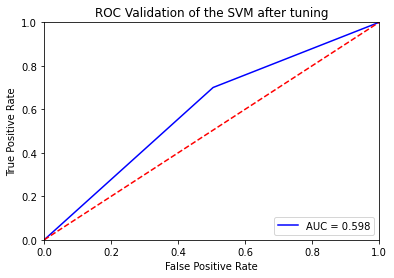

In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
predictions_validation = clf.predict(testX)
fpr, tpr, _ = roc_curve(testY, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation of the SVM after tuning')
plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Approach #2: Decision Tree

A decision tree is a predictive model expressed as a recursive partition of the feature space to subspaces that constitute a basis for prediction (Rokach, 2016). A decision tree is rooted directed tree. In decision trees, nodes with outgoing edges are the internal nodes. All other nodes are terminal nodes or leaves of the decision tree. Decision trees classify using a set of hierarchical decisions on the features.

At the beginning, we could apply the decision tree for the naive training data set without any hyper-parameter tuning, the accuracy of decision tree is 0.5203; the Roc Auc of the decision tree is 0.5196; the loss of decision tree is 0.4796. The Roc AUC plot is shown as below, but base on the ROC AUC score, the performance is not as we expected, thus tuning pyther-parameters is necessary here. With the 5 folds cross validation, it suggests using entropy as the criterion, minimum leaf equals to 10, and the maximum depth equals to 20, the accuracy of decision tree is 0.5527; the ROC AUC of the decision tree is 0.5624; the loss of decision tree is 0.4472. Also from the ROC AUC curve plot, we could see that after tuning the hyper-parameters, the ROC AUC could not been improved a lot, therefore we should consider the some other methods to improve the accuracy. 

In [26]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')
decision_tree = decision_tree.fit(trainX, trainY)


In [27]:
predY = decision_tree.predict(testX) > 0.5

In [28]:
print("loss of Decision Tree:", zero_one_loss(testY, predY))
print("accuracy of Decision Tree:", accuracy_score(testY, predY))
print("roc auc score of Decision Tree:",roc_auc_score(testY, decision_tree.predict_proba(testX)[:,1]))

loss of Decision Tree: 0.4482758620689655
accuracy of Decision Tree: 0.5517241379310345
roc auc score of Decision Tree: 0.5617788869343703


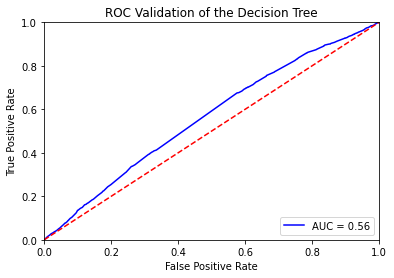

In [29]:
import scipy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

predictions_validation = decision_tree.predict_proba(testX)[:,1]
fpr, tpr, _ = roc_curve(testY, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation of the Decision Tree')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
param = {'criterion':['gini','entropy'],
         'max_depth':range(10,100,10),
         'min_samples_leaf':[5,6,7,8],
         }
gsearch_DCS = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param, 
                        scoring='accuracy',
                        cv=5,
                        verbose =1)
gsearch_DCS.fit(trainX,trainY)
print(gsearch_DCS.best_params_, gsearch_DCS.best_score_, gsearch_DCS.best_estimator_)
print("roc auc score of Decision Tree with the best estimator:",roc_auc_score(testY, gsearch_DCS.best_estimator_.predict_proba(testX)[:,1]))
print("loss of Decision with the best estimator:", zero_one_loss(testY, gsearch_DCS.best_estimator_.predict(testX)))
print("accuracy of Decision Tree with the best estimator:", accuracy_score(testY, gsearch_DCS.best_estimator_.predict(testX)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 8} 0.550162470189741 DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=8)
roc auc score of Decision Tree with the best estimator: 0.5631680416841681
loss of Decision with the best estimator: 0.44536182612918895
accuracy of Decision Tree with the best estimator: 0.554638173870811


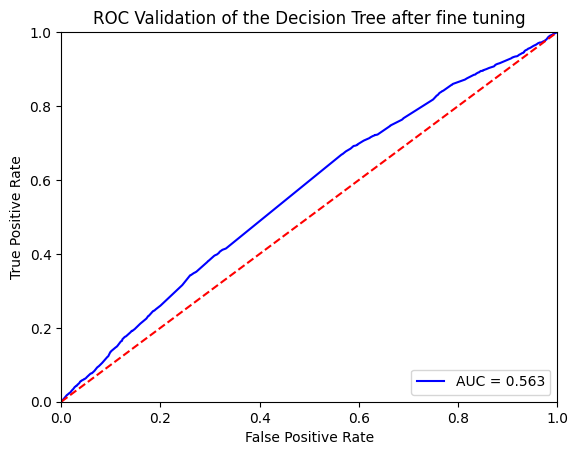

In [36]:
predictions_validation = gsearch_DCS.best_estimator_.predict_proba(testX)[:,1]
fpr, tpr, _ = roc_curve(testY, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation of the Decision Tree after fine tuning')
plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Approach #3: Random Forest

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity. Further, it can be used for both classification and regression tasks. 

At the beginning, we could apply the random forest for the naive training data set without any hyper-parameter tuning, the accuracy of Random Forest is 0.5198; the Roc Auc of the random forest is 0.5405; the loss of Random Forest is 0.4801. The Roc AUC plot is shown as below, but base on the ROC AUC score, the performance is not as we expected, thus tuning pyther-parameters is necessary here. With the 5 folds cross validation, it suggests that when we apply 525 estimators, minimum leaf equals to 20, and the maximum depth equals to 35, the accuracy of Random Forest is 0.5944; the ROC AUC of the random forest is 0.6274; the loss of Random Forest is 0.4084. Also from the ROC AUC curve plot, we could see that after tuning the hyper-parameters, the ROC AUC was been improved somehow. Futhermore, based on the cross validation score, there is no evidence that this random forest model is overfitted. 


In [30]:
rfc = RandomForestClassifier(max_depth = 2, max_features = None)
rfc.fit(trainX, trainY)
predY = rfc.predict(testX) > 0.5


In [31]:
print("roc auc score of Random Forest:",roc_auc_score(testY, rfc.predict_proba(testX)[:,1]))
print("loss of Random Forest:", zero_one_loss(testY, predY))
print("accuracy of Random Forest:", accuracy_score(testY, predY))

roc auc score of Random Forest: 0.5338235556495015
loss of Random Forest: 0.4801359883438563
accuracy of Random Forest: 0.5198640116561437


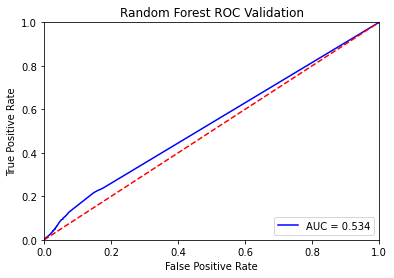

In [32]:
predictions_validation = rfc.predict_proba(testX)[:,1]
fpr, tpr, _ = roc_curve(testY, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('Random Forest ROC Validation')
plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
param_test3 = {'max_depth':range(25, 40, 5)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=525, 
                                                           min_samples_leaf=10,
                                                           random_state=10), 
                        param_grid = param_test3, 
                        scoring='accuracy',
                        cv=5)
gsearch3.fit(trainX,trainY)
print(gsearch3.best_params_, gsearch3.best_score_)

{'max_depth': 35} 0.5853921448727694


In [34]:
print("roc auc score of Random Forest with the best estimator:",roc_auc_score(testY, gsearch3.best_estimator_.predict_proba(testX)[:,1]))
print("loss of Random Forest with the best estimator:", zero_one_loss(testY, gsearch3.best_estimator_.predict(testX)))
print("accuracy of Random Forest with the best estimator:", accuracy_score(testY, gsearch3.best_estimator_.predict(testX)))

roc auc score of Random Forest with the best estimator: 0.6271541159653533
loss of Random Forest with the best estimator: 0.4053423992229237
accuracy of Random Forest with the best estimator: 0.5946576007770763


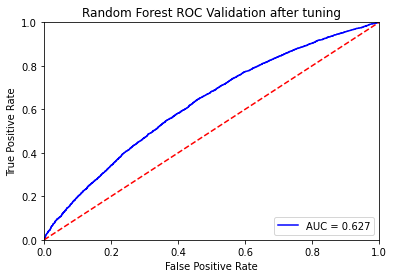

In [35]:
predictions_validation = gsearch3.best_estimator_.predict_proba(testX)[:,1]
fpr, tpr, _ = roc_curve(testY, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('Random Forest ROC Validation after tuning')
plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
## Random Forest Cross Validation
clf_rfc = RandomForestClassifier(n_estimators=525, max_depth=35,min_samples_leaf=10, random_state=10)
scores = cross_val_score(clf_rfc, trainX, trainY)
print(scores.mean())

0.5853921448727694


###Approach #4: Neural Network

neural networks can be a powerful tool for machine learning projects that involve complex data and require a high degree of accuracy in predictions or classifications. Neural networks can adapt and improve over time as they are trained on more data. This means that as your Dota 2 project receives more data, the neural network can become more accurate and better at predicting outcomes.

In [37]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import roc_auc_score
# import numpy as np
# import matplotlib.pyplot as plt

# K = [1, 10, 30, 50, 70]

# tr_auc = np.zeros((len(K),))
# va_auc = np.zeros((len(K),))

# for i, k in enumerate(K):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(trainX, trainY)
#     tr_auc[i] = roc_auc_score(trainY, knn.predict_proba(trainX)[:, 1])
#     va_auc[i] = roc_auc_score(testY, knn.predict_proba(testX)[:, 1])

# f, ax = plt.subplots(1, 1, figsize=(8, 5))
# cax = ax.matshow(va_auc.reshape(1, -1), interpolation='nearest')
# f.colorbar(cax)
# ax.set_xticklabels(['']+K)
# plt.title("K Nearest Neighbour:Validation AUC")
# plt.show()
import torch
from sklearn.model_selection import KFold

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

D_in = trainX.shape[1]

class Dota2Predictor(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(Dota2Predictor, self).__init__()

        def linearBlock(D_in, D_out):
          return torch.nn.Sequential(
              torch.nn.Linear(D_in, D_out),
              torch.nn.ReLU())
                                    

        self.blocks = torch.nn.Sequential(
            linearBlock(D_in, max(64,D_in*2)),
            linearBlock(max(64,D_in*2), 128),
            linearBlock(128, 16),
        )
        self.last = torch.nn.Linear(16, 2)
        self.pred = torch.nn.Softmax()

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        x = self.blocks(x)
        x = self.last(x)
        out = self.pred(x)
        return out



def train(trainX,trainY,testX,testY):
  # Construct our model by instantiating the class defined above
  model = Dota2Predictor()

  tensorX = torch.from_numpy(trainX).float()
  tensorY = torch.from_numpy(trainY)

  tensorTestX = torch.from_numpy(testX).float()
  tensorTestY = torch.from_numpy(testY)

  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay= 0.001)

  num_epochs = 500
  batch_size = 128
  train_loss = []
  test_loss = []
  for t in range(num_epochs):

    permutation = torch.randperm(tensorX.size()[0])

    for i in range(0,tensorX.size()[0], batch_size):
      indices = permutation[i:i+batch_size]
      batch_x, batch_y = tensorX[indices], tensorY[indices]
      y_pred = model(batch_x)
      # Compute and print loss
      loss = criterion(y_pred, batch_y)

      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    if t % 10 == 0:
      print("train loss when {} = {}".format(t,loss.item()))
      with torch.no_grad():
        predY = model(tensorTestX)
        loss = criterion(predY, tensorTestY)
        print(predY[:3])
        print(tensorTestY[:3])
        print("test loss:",loss)
        out = torch.argmax(predY,axis = 1).numpy()
        auc = roc_auc_score(testY, out)
        print("AUC score:", auc)
        print("accuracy of NN:", accuracy_score(testY, out))


# kf = KFold(n_splits=5)
# for train_index, test_index in kf.split(allX, allY):  
#     x_train_fold = allX[train_index] 
#     y_train_fold = allY[train_index] 
#     x_test_fold = allX[test_index] 
#     y_test_fold = allY[test_index] 
#     train(x_train_fold, y_train_fold, x_test_fold, y_test_fold)


train(trainX,trainY,testX,testY)

Using device: cpu



<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 0 = 0.6775965094566345
tensor([[0.3956, 0.6044],
        [0.4101, 0.5899],
        [0.4682, 0.5318]])
tensor([1, 1, 0])
test loss: tensor(0.6806)
AUC score: 0.5554189395884381
accuracy of NN: 0.5689169499757164


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 10 = 0.6495445370674133
tensor([[0.4016, 0.5984],
        [0.2143, 0.7857],
        [0.6720, 0.3280]])
tensor([1, 1, 0])
test loss: tensor(0.6644)
AUC score: 0.5986812631109749
accuracy of NN: 0.5979601748421564


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 20 = 0.6374441981315613
tensor([[0.4157, 0.5843],
        [0.2055, 0.7945],
        [0.6550, 0.3450]])
tensor([1, 1, 0])
test loss: tensor(0.6632)
AUC score: 0.6023887942877654
accuracy of NN: 0.6032054395337543


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 30 = 0.6813036799430847
tensor([[0.4324, 0.5676],
        [0.1981, 0.8019],
        [0.6281, 0.3719]])
tensor([1, 1, 0])
test loss: tensor(0.6634)
AUC score: 0.603011381316515
accuracy of NN: 0.6049538610976202


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 40 = 0.6945715546607971
tensor([[0.3890, 0.6110],
        [0.1635, 0.8365],
        [0.6267, 0.3733]])
tensor([1, 1, 0])
test loss: tensor(0.6629)
AUC score: 0.6002842153917892
accuracy of NN: 0.6029140359397765


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 50 = 0.6605794429779053
tensor([[0.4001, 0.5999],
        [0.1966, 0.8034],
        [0.6265, 0.3735]])
tensor([1, 1, 0])
test loss: tensor(0.6631)
AUC score: 0.5990432182485719
accuracy of NN: 0.6011656143759107


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 60 = 0.6620104908943176
tensor([[0.3310, 0.6690],
        [0.1377, 0.8623],
        [0.5334, 0.4666]])
tensor([1, 1, 0])
test loss: tensor(0.6644)
AUC score: 0.5933690975476184
accuracy of NN: 0.6


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 70 = 0.6525260806083679
tensor([[0.4055, 0.5945],
        [0.1928, 0.8072],
        [0.6375, 0.3625]])
tensor([1, 1, 0])
test loss: tensor(0.6632)
AUC score: 0.6015417878916812
accuracy of NN: 0.6036911121903836


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 80 = 0.6920644640922546
tensor([[0.3377, 0.6623],
        [0.1626, 0.8374],
        [0.5659, 0.4341]])
tensor([1, 1, 0])
test loss: tensor(0.6635)
AUC score: 0.5990328043129645
accuracy of NN: 0.6041767848470131


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 90 = 0.6529505252838135
tensor([[0.4200, 0.5800],
        [0.2204, 0.7796],
        [0.6632, 0.3368]])
tensor([1, 1, 0])
test loss: tensor(0.6635)
AUC score: 0.6027907608621695
accuracy of NN: 0.6032054395337543


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 100 = 0.6402334570884705
tensor([[0.3395, 0.6605],
        [0.1502, 0.8498],
        [0.5493, 0.4507]])
tensor([1, 1, 0])
test loss: tensor(0.6638)
AUC score: 0.5934958791811101
accuracy of NN: 0.5993200582807188


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 110 = 0.6537400484085083
tensor([[0.4271, 0.5729],
        [0.2003, 0.7997],
        [0.6620, 0.3380]])
tensor([1, 1, 0])
test loss: tensor(0.6641)
AUC score: 0.6007862578083728
accuracy of NN: 0.6005828071879553


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 120 = 0.6548957228660583
tensor([[0.3443, 0.6557],
        [0.1550, 0.8450],
        [0.5557, 0.4443]])
tensor([1, 1, 0])
test loss: tensor(0.6635)
AUC score: 0.596782260217904
accuracy of NN: 0.601748421563866


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 130 = 0.6433831453323364
tensor([[0.3898, 0.6102],
        [0.1898, 0.8102],
        [0.6191, 0.3809]])
tensor([1, 1, 0])
test loss: tensor(0.6632)
AUC score: 0.6023342298011986
accuracy of NN: 0.604273919378339


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 140 = 0.6650276780128479
tensor([[0.3656, 0.6344],
        [0.1513, 0.8487],
        [0.5665, 0.4335]])
tensor([1, 1, 0])
test loss: tensor(0.6636)
AUC score: 0.5963023308769297
accuracy of NN: 0.6016512870325401


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 150 = 0.65631502866745
tensor([[0.3541, 0.6459],
        [0.1470, 0.8530],
        [0.5585, 0.4415]])
tensor([1, 1, 0])
test loss: tensor(0.6633)
AUC score: 0.597113332649907
accuracy of NN: 0.6015541525012141


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 160 = 0.6414645910263062
tensor([[0.3837, 0.6163],
        [0.1679, 0.8321],
        [0.5751, 0.4249]])
tensor([1, 1, 0])
test loss: tensor(0.6632)
AUC score: 0.5999069701019122
accuracy of NN: 0.604273919378339


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 170 = 0.7075274586677551
tensor([[0.3584, 0.6416],
        [0.1403, 0.8597],
        [0.5536, 0.4464]])
tensor([1, 1, 0])
test loss: tensor(0.6636)
AUC score: 0.5943282947273054
accuracy of NN: 0.6000971345313258


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 180 = 0.6229890584945679
tensor([[0.3717, 0.6283],
        [0.1733, 0.8267],
        [0.5964, 0.4036]])
tensor([1, 1, 0])
test loss: tensor(0.6631)
AUC score: 0.5971795962764757
accuracy of NN: 0.6010684798445848


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 190 = 0.6616028547286987
tensor([[0.3956, 0.6044],
        [0.2019, 0.7981],
        [0.6284, 0.3716]])
tensor([1, 1, 0])
test loss: tensor(0.6627)
AUC score: 0.6019547921038251
accuracy of NN: 0.6041767848470131


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 200 = 0.6661949753761292
tensor([[0.4137, 0.5863],
        [0.1859, 0.8141],
        [0.6215, 0.3785]])
tensor([1, 1, 0])
test loss: tensor(0.6631)
AUC score: 0.6000024154282588
accuracy of NN: 0.6012627489072365


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 210 = 0.6500440239906311
tensor([[0.3242, 0.6758],
        [0.1385, 0.8615],
        [0.5814, 0.4186]])
tensor([1, 1, 0])
test loss: tensor(0.6642)
AUC score: 0.5926731782681312
accuracy of NN: 0.5988343856240894


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 220 = 0.6210047602653503
tensor([[0.3933, 0.6067],
        [0.1750, 0.8250],
        [0.6211, 0.3789]])
tensor([1, 1, 0])
test loss: tensor(0.6632)
AUC score: 0.5995555990005041
accuracy of NN: 0.6026226323457989


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 230 = 0.66354900598526
tensor([[0.3783, 0.6217],
        [0.1932, 0.8068],
        [0.6200, 0.3800]])
tensor([1, 1, 0])
test loss: tensor(0.6630)
AUC score: 0.6009819112773509
accuracy of NN: 0.6032054395337543


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 240 = 0.6914112567901611
tensor([[0.2178, 0.7822],
        [0.0857, 0.9143],
        [0.4141, 0.5859]])
tensor([1, 1, 0])
test loss: tensor(0.6757)
AUC score: 0.568769831837809
accuracy of NN: 0.5815444390480816


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 250 = 0.6918378472328186
tensor([[0.3144, 0.6856],
        [0.1334, 0.8666],
        [0.5420, 0.4580]])
tensor([1, 1, 0])
test loss: tensor(0.6650)
AUC score: 0.5892715068371361
accuracy of NN: 0.5965031568722681


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 260 = 0.6394407153129578
tensor([[0.4443, 0.5557],
        [0.2026, 0.7974],
        [0.6441, 0.3559]])
tensor([1, 1, 0])
test loss: tensor(0.6634)
AUC score: 0.6013443578166282
accuracy of NN: 0.6019426906265177


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 270 = 0.686988115310669
tensor([[0.3209, 0.6791],
        [0.1301, 0.8699],
        [0.5471, 0.4529]])
tensor([1, 1, 0])
test loss: tensor(0.6657)
AUC score: 0.5891356720726899
accuracy of NN: 0.5969888295288975


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 280 = 0.6708045601844788
tensor([[0.3513, 0.6487],
        [0.1576, 0.8424],
        [0.5640, 0.4360]])
tensor([1, 1, 0])
test loss: tensor(0.6634)
AUC score: 0.5988059846374227
accuracy of NN: 0.6037882467217096


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 290 = 0.6562148928642273
tensor([[0.3261, 0.6739],
        [0.1572, 0.8428],
        [0.5610, 0.4390]])
tensor([1, 1, 0])
test loss: tensor(0.6643)
AUC score: 0.5911810559662666
accuracy of NN: 0.5976687712481787


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 300 = 0.6368001103401184
tensor([[0.4451, 0.5549],
        [0.2202, 0.7798],
        [0.6597, 0.3403]])
tensor([1, 1, 0])
test loss: tensor(0.6640)
AUC score: 0.6015181817109669
accuracy of NN: 0.6013598834385624


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 310 = 0.6496240496635437
tensor([[0.3157, 0.6843],
        [0.1434, 0.8566],
        [0.5412, 0.4588]])
tensor([1, 1, 0])
test loss: tensor(0.6645)
AUC score: 0.5914626480290861
accuracy of NN: 0.5981544439048082


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 320 = 0.679058313369751
tensor([[0.3592, 0.6408],
        [0.1686, 0.8314],
        [0.6175, 0.3825]])
tensor([1, 1, 0])
test loss: tensor(0.6630)
AUC score: 0.5980809214582867
accuracy of NN: 0.601748421563866


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 330 = 0.6764827370643616
tensor([[0.4783, 0.5217],
        [0.2324, 0.7676],
        [0.6879, 0.3121]])
tensor([1, 1, 0])
test loss: tensor(0.6658)
AUC score: 0.595394466272759
accuracy of NN: 0.5932005828071879


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 340 = 0.7127914428710938
tensor([[0.3052, 0.6948],
        [0.1483, 0.8517],
        [0.5308, 0.4692]])
tensor([1, 1, 0])
test loss: tensor(0.6646)
AUC score: 0.5918827208653992
accuracy of NN: 0.5985429820301117


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 350 = 0.6686543822288513
tensor([[0.4350, 0.5650],
        [0.2202, 0.7798],
        [0.6577, 0.3423]])
tensor([1, 1, 0])
test loss: tensor(0.6645)
AUC score: 0.5975434036204057
accuracy of NN: 0.5966002914035939


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 360 = 0.701460599899292
tensor([[0.4101, 0.5899],
        [0.1853, 0.8147],
        [0.6236, 0.3764]])
tensor([1, 1, 0])
test loss: tensor(0.6632)
AUC score: 0.6030937666982071
accuracy of NN: 0.6045653229723167


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 370 = 0.7020200490951538
tensor([[0.4452, 0.5548],
        [0.2108, 0.7892],
        [0.6794, 0.3206]])
tensor([1, 1, 0])
test loss: tensor(0.6640)
AUC score: 0.6000079531471935
accuracy of NN: 0.5998057309373482


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 380 = 0.6556215286254883
tensor([[0.3630, 0.6370],
        [0.1708, 0.8292],
        [0.5830, 0.4170]])
tensor([1, 1, 0])
test loss: tensor(0.6633)
AUC score: 0.5988877085168529
accuracy of NN: 0.6033025740650801


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 390 = 0.6534356474876404
tensor([[0.3926, 0.6074],
        [0.1769, 0.8231],
        [0.6031, 0.3969]])
tensor([1, 1, 0])
test loss: tensor(0.6630)
AUC score: 0.6017853908246082
accuracy of NN: 0.604273919378339


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 400 = 0.673840343952179
tensor([[0.3524, 0.6476],
        [0.1573, 0.8427],
        [0.5631, 0.4369]])
tensor([1, 1, 0])
test loss: tensor(0.6634)
AUC score: 0.597325353574849
accuracy of NN: 0.6020398251578436


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 410 = 0.6655652523040771
tensor([[0.5179, 0.4821],
        [0.2437, 0.7563],
        [0.7210, 0.2790]])
tensor([1, 1, 0])
test loss: tensor(0.6670)
AUC score: 0.5921812095859919
accuracy of NN: 0.5890237979601748


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 420 = 0.6447210311889648
tensor([[0.3661, 0.6339],
        [0.1827, 0.8173],
        [0.6180, 0.3820]])
tensor([1, 1, 0])
test loss: tensor(0.6634)
AUC score: 0.5981131649685337
accuracy of NN: 0.6019426906265177


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 430 = 0.617263913154602
tensor([[0.4469, 0.5531],
        [0.2030, 0.7970],
        [0.6501, 0.3499]])
tensor([1, 1, 0])
test loss: tensor(0.6637)
AUC score: 0.6006188410359412
accuracy of NN: 0.6009713453132589


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 440 = 0.6672486066818237
tensor([[0.3327, 0.6673],
        [0.1465, 0.8535],
        [0.5456, 0.4544]])
tensor([1, 1, 0])
test loss: tensor(0.6643)
AUC score: 0.592191925922633
accuracy of NN: 0.5985429820301117


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 450 = 0.673416018486023
tensor([[0.4443, 0.5557],
        [0.2418, 0.7582],
        [0.6789, 0.3211]])
tensor([1, 1, 0])
test loss: tensor(0.6645)
AUC score: 0.5990929443185952
accuracy of NN: 0.5982515784361341


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 460 = 0.6478293538093567
tensor([[0.4021, 0.5979],
        [0.1790, 0.8210],
        [0.6295, 0.3705]])
tensor([1, 1, 0])
test loss: tensor(0.6630)
AUC score: 0.600400167288252
accuracy of NN: 0.6029140359397765


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 470 = 0.629815936088562
tensor([[0.3544, 0.6456],
        [0.1638, 0.8362],
        [0.5834, 0.4166]])
tensor([1, 1, 0])
test loss: tensor(0.6631)
AUC score: 0.5981880281245058
accuracy of NN: 0.6027197668771248


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 480 = 0.6551232933998108
tensor([[0.4695, 0.5305],
        [0.2677, 0.7323],
        [0.6988, 0.3012]])
tensor([1, 1, 0])
test loss: tensor(0.6673)
AUC score: 0.5932461904273744
accuracy of NN: 0.5898980087421078


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


train loss when 490 = 0.6819605231285095
tensor([[0.3907, 0.6093],
        [0.1906, 0.8094],
        [0.6152, 0.3848]])
tensor([1, 1, 0])
test loss: tensor(0.6631)
AUC score: 0.5999149459291832
accuracy of NN: 0.6020398251578436


<ipython-input-37-d25a781fd965>:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.pred(x)


#Result and Discussion


<div style="text-align:justify">
In all, all of the machine learning models perfom not that good. In our opinion, the dataset does not include much useful information. In reality, when we are playing the game, although the hero choice is important to win, for example, a team including a tank and healer have more probability to beat the other unbalanced team, the winning rate could not be exact predicted using only the choice of heroes. Our point is that, heroes in the team may not have a big effect on the winning rate, but the player behind the hero matters. One professional player will carry the whole team no matter which heroes his teammates choose if the other side are all newcomers. To improve the model, we had better gain more information, for example, the time length of the game, the players' length of career in this game and so on.
</div>

#Prediction

In [37]:
from sklearn.calibration import CalibratedClassifierCV
clf2 = CalibratedClassifierCV(svm.LinearSVC())
clf2.fit(trainX, trainY)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

CalibratedClassifierCV(estimator=LinearSVC())

In [38]:
input_allies = ['Omniknight', 'Elder Titan', 'Necrophos', 'Spectre']
input_enemies = ['Broodmother', 'Phantom Assassin', 'Pudge', 'Legion Commander', 'Skeleton King']

input_X = np.array([0 for x in range(333)])

#translate input into X format
#0->010, 1->001, -1->100
for i in range(len(input_allies)):
    temp = hero_names.index(input_allies[i])
    input_X[3 * temp + 2] = 1
for i in range(len(input_enemies)):
    temp = hero_names.index(input_enemies[i])
    input_X[3 * temp] = 1

max_wp = 0.0
location_wp = 0

enemy_picks = [hero_names.index(name) for name in input_enemies]
#we use this into a loop to find the best win probability heroes
for i in range(len(hero_names)):
    if input_X[i] == 0 and i not in enemy_picks:
        temp = input_X.copy()
        temp[3*i+2] = 1
        for j in range(len(hero_names)):
            if j not in [hero_names.index(name) for name in input_allies] and j != i and j not in enemy_picks:
                temp[j * 3 + 1] = 1
    
        #now we use this temp to compute the win probability
        wp = clf2.predict_proba(temp.reshape(1, -1))
        if wp[0][0] > max_wp:
            max_wp = wp[0][0]
            location_wp = i

print("Input allies :", input_allies)
print("Input enemies :", input_enemies)
print("The best hero choice is ", hero_names[location_wp], " with the win probability of ", max_wp)

Input allies : ['Omniknight', 'Elder Titan', 'Necrophos', 'Spectre']
Input enemies : ['Broodmother', 'Phantom Assassin', 'Pudge', 'Legion Commander', 'Skeleton King']
The best hero choice is  Lone Druid  with the win probability of  0.2758915880757993
